# Integrazioni numerica equazioni differenziali
## Introduzione

Cominciamo con l'affrontare il  problema meccanico di trovare il moto di un oggetto a partire dalle equazioni della dinamica.

Per il momento pensiamo ad una punto materiale che si possa muovere lungo una retta (moto 1D) sotto l'azione di una forza esterna.

L'equazione della dinamica sarebbe semplicemente:

$$
F = m a
$$

dove la forza si pensa generalmente funzione del tempo della posizione e della velocità $F= F(x,v,t)$.
 
Si impongano, inoltre, le seguenti condizioni iniziali:
$$
 x(t = 0) = x_0\\
 v(t = 0) = v_0\\
$$
Il problema di determinare il moto sarebbe trovare la funzione spostamento, x = x(t), tale per cui la sua accelerazione nel tempo, a = a(t), soddisfi l'equazione della dinamica e cioè 
$$
 a =\frac{d^2x}{dt^2}= F(x,v,t)/m
$$
e che al tempo t=0 abbia proprio quelle condizioni di partenza $ x(t = 0) = x_0$ e $ v(t = 0) = v_0 $.

Ora utilizziamo le seguenti definizioni
$$
 \frac{dx}{dt} = v\\
\frac{dv}{dt} = a
$$

dove abbiamo riportato per riferimento futuro le velocità e le accelerazioni come derivate nel tempo delle posizione e della velocità rispettivamente. 

## Sistema di equazioni differenziali

Dal punto di vista formale risolvere un equazione differenziale della dinamica del punto in 1D significa risolvere un sistema di due equazioni differenziali, una per la posizione e una per la velocità, del tipo:

$$
\begin{eqnarray}
 \frac{d u_1}{dt} = f_1(t,u_1,u_2) & \quad &u_1(t_0) =u_{1,0} \\
 \frac{d u_2}{dt}  = f_2(t,u_1,u_2) & \quad &u_2(t_0) =u_{2,0}
 \end{eqnarray}
$$

dove abbiamo sostituito $x$ con  $u_1$ $v$ con  $u_2$ e dove la funzioni nel termine di destra sono rispettivamente $f_1 = u_2$ e $f_2 = a$.
In realtà in generale un sistema di   m  equazioni differenziali nelle incognite $\overline{u}=[u_1...u_m]$ si può scirvere semplicemente con l'equazione vettoriale:
$$
    \frac{d\overline{u}}{dt}  =  \overline{f}(t,\overline{u})
$$


## Metodo di Eulero esplicito 
Il metodo di Eulero esplicito è un metodo di intergrazione numerica che utilizza un'approssimazione del concetto di derivata e cioè, per esempio:

$$
v = \frac{dx}{dt} \approx \frac{\Delta x}{\Delta t}   
$$


Ora ci si accontenta di calcolare la posizione a partire dalla velocità solo a istanti di tempo discereti e cioè per $t = [0:\Delta t:T]$ dove T è il perido di tempo per cui si vuole calcolare la soluzione e $\Delta t = T/N$ è il passo tempo con cui si discretizza l'intervallo: nella formula N è il numero di intervalli in cui si divide il periodo T.

Il generico tempo all'istente i+1-esimo si potrà quindi scivere come $t_{i+1} = t_i + \Delta t$.

La posizione e la velocità risulteranno discretizzatate nel tempo a diversi istanti $t_i$ e i loro valori saranno  $ x(t_i) = x_{i}$ e $v(t_i) = v_i$.

Ora sfruttando l'approsimazione di Eulero possiamo scrivere:

$$
     v_i = \frac{x_{i+1} - x_{i}}{\Delta t} \\
     a_i =  \frac{v_{i+1} - v_{i}}{\Delta t}   \\
$$
Possiamo quindi costruire la solzione al tempo i+1-esimo a partire dei dati del tempo i-esimo in questo modo
$$
\begin{eqnarray}
x_{i+1}  &=& x_i + v_i\Delta t  \\
v_{i+1}  &=& v_i + a_i\Delta t  \\ 
         &=& v_i + \frac{F(x_i,v_i,t_i)}{m}\Delta t 
    \end{eqnarray}
$$

riprendendo il formalismo visto sopra il metodo di Eulero si traduce nella seguente formula:

$$
    \overline{u_{i+1}} =  \overline{u_{i}} + \Delta t \overline{f}(t_i,\overline{u}_i)
$$

**Esempio caduta del grave**

Proviamo ora ad impostare il seguente semplice problema di dinamica. Si pensa ad una corpo di massa $m =1kg$ che viene lasciato cadere da fermo da $h = 1m$ di altezza. La forza applicata in ogni istante di tempo sarà $F(t,x,v) = -m g$. 

La soluzione analitica del problema sarà:

$$
     x(t) = x_0  + v_0 t + \frac{1}{2} a t^2 = h  - \frac{1}{2} g t^2 
$$

<class 'numpy.float64'>


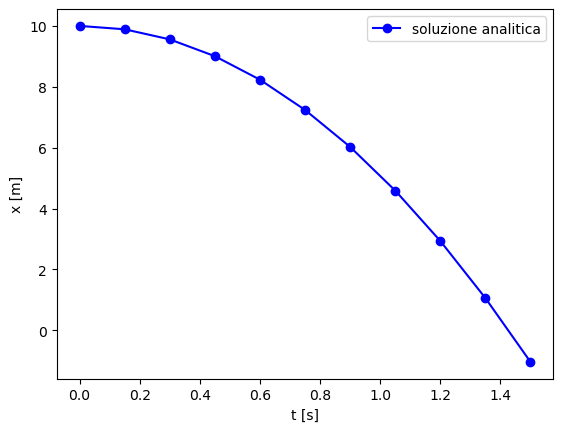

In [2]:
import math 
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 # m/s^2 accelerazione di gravità
m = 1 # kg massa

x0 = 10 # m posizione iniziale corpo
v0 = 0 # velocità iniziale corpo
a = -g

N = 10 # numero di intervalli di tempo
T = 1.5 # perido di integrazione
tsol = np.linspace(0,T,N+1) # N intervalli N+1 istanti
dt = tsol[1] - tsol[0]
print(type(dt))
xsol = x0 + v0*tsol + 1/2*a*tsol**2

fig, ax = plt.subplots()
l, = ax.plot(tsol, xsol,'b-o')
l.set_label('soluzione analitica')
ax.set_xlabel('t [s]')
ax.set_ylabel('x [m]')
ax.legend()
plt.show()

Costruiamo la soluzione numerica con il metodo di Eulero esplicito.

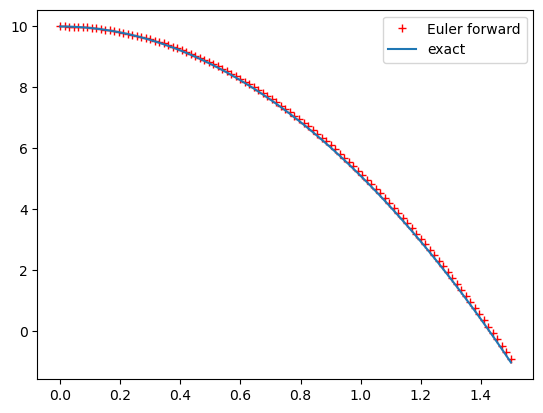

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # numero di intervalli di tempo
T = 1.5 # perido di integrazione
dt = T/N

t = np.zeros(N + 1)
u = np.zeros((N + 1,2))

u[0,0] = x0 # q prima colonna variabile generica per la posizione
u[0,1] = v0 # q secondo colonna varibile generica per la velocità

# metodo Eulero
for i in range(N):
    F = -m*g
    ai = F/m
    xi  = u[i,0]
    vi  = u[i,1]
    
    t[i + 1]   = t[i] + dt
    u[i + 1,0] = xi + vi*dt
    u[i + 1,1] = vi + ai*dt

usol = x0 + v0*t + 1/2*a*t**2
fig,ax = plt.subplots()    
ax.plot(t, u[:,0],'+r',label = 'Euler forward')
ax.plot(t, usol,'-',label = 'exact')
ax.legend()
plt.show()

## Misure di errore

Per misurare l'errore si possono utilizzare diverse formulazioni. Definendo per esempio l'errore come il massimo dello scostamento del risutlato numerico  $u_i$ e la soluzione al tempo  tempo  $t_i$, $\hat{u}(t_i)$ su N punti si scriverà

$$
    el_\infty = \underset{i=1}{\overset{N}{\text{max}}} (|u_i - \hat{u}(t_i)|)  
$$

oppure con la formula del'errore RMSE round mean square error:
$$
    RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(u_i - \hat{u}(t_i))^2}  
$$

Vediamo per caso l'errore nella soluzione numerica nel caso precedente:

In [9]:
def elinfty(x,xsol):
    return np.max(np.abs(x - xsol))
def RMSE(x,xsol):
    N = np.size(x)
    return np.sqrt(1/N*np.sum((x - xsol)**2))   

err    = elinfty(u[:,0] ,usol)  
RMSerr = RMSE(u[:,0] ,usol) 
print("err  ={0:14.3f}, err/dt  ={1:14.3f}".format(err,err/dt))
print("RMSE ={0:14.3f}, RMSE/dt ={1:14.3f}".format(RMSerr,RMSerr/dt))


err  =         0.110, err/dt  =         7.357
RMSE =         0.064, RMSE/dt =         4.258


**Esempio massa molla**

<img src="Screenshot 2024-06-25 at 00-01-58 1002000.pdf.png" alt="Drawing" style="width: 600px;"/>

Costruiamo l'equazione della dinamica per il sistema massa molla:
$$
    F_k(x) = ma 
$$

La forza è modellata con la legge di Hooke in funzione dello spostamento $F_k(x) = -kx$.

L'accelerazione si esprime solitamente con $\ddot{x} = a$ e quindi l'equazione diventa:
$$
 m \ddot{x} + kx = 0 \\
$$
Solitamente si definisce $\omega = \sqrt{\frac{k}{m}}$ frequenza naturale del sistema e l'equazione diventa:
$$
 \ddot{x} + \omega^2x = 0
$$

La soluzione analitica del problema considerando una posizione iniziale $x_0 = x(t_0)$ e la velocità iniziale $\dot{x_0}  = v(t_0)$ possiamo scriverla come:
$$
x(t)  = x_0 \cos(\omega t) + \frac{\dot{x_0}}{\omega} \sin(\omega t) 
$$

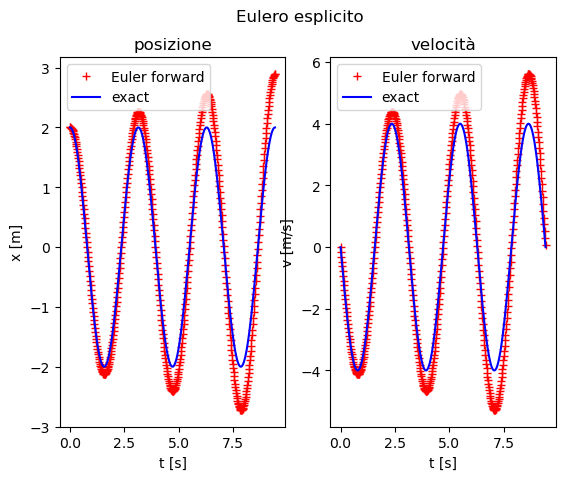

err  =         0.895, err/dt  =        45.573
RMSE =         0.350, RMSE/dt =        17.800


In [15]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 2
v0 = 0

omega = 2
Tper = 2*np.pi/omega


nper = 3 # numero di periodo
T    = nper*Tper #tempo totale simulazione
N_per = 160 # numero di intervalli di tempo in un perido
N    = N_per*nper # numero di intervalli di tempo 
dt   = T/N # intervallo di tempo

tsol = np.linspace(0,T,N+1)
xsol = x0*np.cos(omega*tsol) + v0/omega*np.sin(omega*tsol)
vsol = -omega*x0*np.sin(omega*tsol) + v0*np.cos(omega*tsol)

t = np.zeros(N + 1)
u = np.zeros((N + 1,2))
u[0,0] = x0 # q prima colonna variabile generica per la posizione
u[0,1] = v0 # q secondo colonna varibile generica per la velocità

# Integrazione con Eulero esplicito
for i in range(N):
    
    xi  = u[i,0]
    vi  = u[i,1]
    ai  = -(omega**2)*xi
    
    t[i + 1]   = t[i] + dt
    u[i + 1,1] = vi + ai*dt
    u[i + 1,0] = xi + vi*dt
    
fig,axs = plt.subplots(1,2)    
fig.suptitle('Eulero esplicito')
axs[0].plot(t, u[:,0],'+r',label = 'Euler forward')
axs[0].plot(tsol, xsol,'-b',label = 'exact')
axs[0].legend()
axs[0].set_title('posizione')
axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("x [m]")
    
axs[1].plot(t, u[:,1],'+r',label = 'Euler forward')
axs[1].plot(tsol, vsol,'-b',label = 'exact')
axs[1].legend()
axs[1].set_title('velocità')
axs[1].set_xlabel("t [s]")
axs[1].set_ylabel("v [m/s]")

plt.show()


err    = elinfty(u[:,0] ,xsol)  
RMSerr = RMSE(u[:,0] ,xsol) 
print("err  ={0:14.3f}, err/dt  ={1:14.3f}".format(err,err/dt))
print("RMSE ={0:14.3f}, RMSE/dt ={1:14.3f}".format(RMSerr,RMSerr/dt))


## Metodo Eulero semi implicito

E' possibile migliorare il metodo di Eulero esplicito facendo una semplice modifica. Ricapitolando il metodo di Eulero diretto può essere scritto come:
$$
\begin{eqnarray}
x_{i+1}  &=& x_i + v_i\Delta t  \\
v_{i+1}  &=& v_i + a_i\Delta t 
\end{eqnarray}
$$
Ora, invece di aggiornare la posizione con il valore della velocità al tempo i-esimo la possiamo aggiornare con il nuovo valore calcolato al tempo i+ esimo, come sotto: 
$$
\begin{eqnarray}
v_{i+1}  &=& v_i + a_i\Delta t \\ 
x_{i+1}  &=& x_i + v_{i+1}\Delta t 
\end{eqnarray}
$$

    
    

Questa soluizione migliora la stabilità dell'intergrazione temporale in modo evidente anche se causa uno certo errore di sfasamento tra le soluzioni per simulazioni più lunghe.

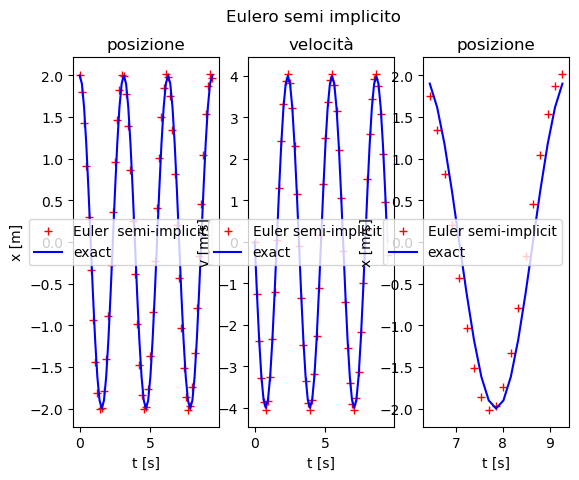

err  =         0.461, err/dt  =         2.934
RMSE =         0.279, RMSE/dt =         1.777


In [20]:
nper = 3 # numero di periodo
T    = nper*Tper #perido
N_per = 20 # numero di intervalli di tempo in un perido
N    = N_per*nper # numero di intervalli di tempo 
dt   = T/N # intervallo di tempo

tsol = np.linspace(0,T,N+1)
xsol = x0*np.cos(omega*tsol) + v0/omega*np.sin(omega*tsol)
vsol = -omega*x0*np.sin(omega*tsol) + v0*np.cos(omega*tsol)

t = np.zeros(N + 1)
u = np.zeros((N + 1,2))
u[0,0] = x0 # q prima colonna variabile generica per la posizione
u[0,1] = v0 # q secondo colonna varibile generica per la velocità

# Integrazione con Eulero semi implicito
for i in range(N):
    
    xi  = u[i,0]
    vi  = u[i,1]
    ai = -(omega**2)*xi
    
    t[i + 1]   = t[i] + dt
    u[i + 1,1] = vi + ai*dt
    u[i + 1,0] = xi + u[i + 1,1]*dt
    
fig,axs = plt.subplots(1,3)    
fig.suptitle('Eulero semi implicito')
axs[0].plot(t, u[:,0],'+r',label = 'Euler  semi-implicit')
axs[0].plot(tsol, xsol,'-b',label = 'exact')
axs[0].legend()
axs[0].set_title('posizione')
axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("x [m]")
    
axs[1].plot(t, u[:,1],'+r',label = 'Euler semi-implicit')
axs[1].plot(tsol, vsol,'-b',label = 'exact')
axs[1].legend()
axs[1].set_title('velocità')
axs[1].set_xlabel("t [s]")
axs[1].set_ylabel("v [m/s]")


axs[2].plot(t[-N_per:-1], u[-N_per:-1,0],'+r',label = 'Euler semi-implicit')
axs[2].plot(tsol[-N_per:-1], xsol[-N_per:-1],'-b',label = 'exact')
axs[2].legend()
axs[2].set_title('posizione')
axs[2].set_xlabel("t [s]")
axs[2].set_ylabel("x [m/s]")

plt.show()

err    = elinfty(u[:,0] ,xsol)  
RMSerr = RMSE(u[:,0] ,xsol) 
print("err  ={0:14.3f}, err/dt  ={1:14.3f}".format(err,err/dt))
print("RMSE ={0:14.3f}, RMSE/dt ={1:14.3f}".format(RMSerr,RMSerr/dt))

## Utilizzo solutore solver_ivp
Altri metodi possono essere definiti per aumentare l'accuratezza e la stabilità dell'integrazione.
La libreria sciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) fornisce un solutore numerico generale per le equazioni differenziali



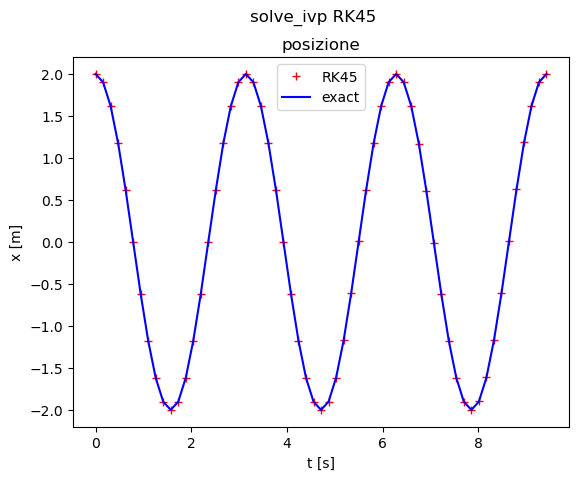

err  =         0.010, err/dt  =         0.062
RMSE =         0.004, RMSE/dt =         0.027


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy.integrate import solve_ivp

class mass_spring:
    def __init__(self,  omega):
        self.omega = omega
    
    def __call__(self, t, u):
        x, v = u
        dx = v
        dv = -self.omega**2 * x
        return [dx, dv]

nper = 3 # numero di periodo
T    = nper*Tper #perido
N_per = 20 # numero di intervalli di tempo in un perido
N    = N_per*nper # numero di intervalli di tempo 
dt   = T/N # intervallo di tempo

tsol  = np.linspace(0,T,N+1)
xsol = x0*np.cos(omega*tsol) + v0/omega*np.sin(omega*tsol)
vsol = -omega*x0*np.sin(omega*tsol) + v0*np.cos(omega*tsol)

u0 = np.array([x0,v0])
# metodo Runge Kutta predictor corrector 4/5 ordine
sol = solve_ivp(mass_spring(omega=2), [0, T], u0 , method='RK45', t_eval=tsol)

fig,ax = plt.subplots()    
fig.suptitle('solve_ivp RK45')
ax.plot(sol.t, sol.y[0,:],'+r',label = 'RK45')
ax.plot(tsol, xsol,'-b',label = 'exact')
ax.legend()
ax.set_title('posizione')
ax.set_xlabel("t [s]")
ax.set_ylabel("x [m]")

plt.show()

err    = elinfty(sol.y[0,:] ,xsol)  
RMSerr = RMSE(sol.y[0,:] ,xsol) 
print("err  ={0:14.3f}, err/dt  ={1:14.3f}".format(err,err/dt))
print("RMSE ={0:14.3f}, RMSE/dt ={1:14.3f}".format(RMSerr,RMSerr/dt))

## Esercizi 
0. Costruire il problema di un particella di massa forzata a muoversi con una forza varibile nel tempo con legge F = fcos($\omega_f$t), soluzione
$$
x = -\omega^2_f \frac f m cos(\omega_f t) + x_0\\
v = \omega_f \frac f m sin(\omega_f t) + v_0
$$
1. Costruire il problema 2D di un corpo che cade con velocità iniziale $\overline{v_0}=[v_{0,x},v_{0,x}]^T$ e posizione iniziale $\overline{x_0}=[x_{0,x},x_{0,x}]^T$, soluzione 
$$
x = x_0 + v_{0,x}t\\
y = y_0 + v_{0,y}t - \frac1 2gt^2\\
$$
2. Costruire il problema 2D di una particelle di massa che si muove in due dimensioni soggetta a due forze costanti nelle due direzioni

3. Costruire il problema 2D di una particelle di massa che si muove vincolata agli assi x e y da due molle, eventualmente con rigidezza diversa, che possono scorrere lungo gli assi e cioè con le forze di richiamo $F_{k,x} = -k_xx$ $F_{k,y} = -k_yy$, soluzione:


4. Costruire il problema 2D di una particella di massa $M_1$ soggetta ad un campo gravitazionale centrale di una massa $M_2$ ferma del tipo $ \overline{F} = G\frac{M_1M_2}{|\overline{r}|^3} \overline{r} $ dove $\overline{r} $ è il vettore posizione della particella di massa 

